# Ames Housing Preisvorhersage
---
### Luis Steinert und Constantin Rech

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../ames.csv')

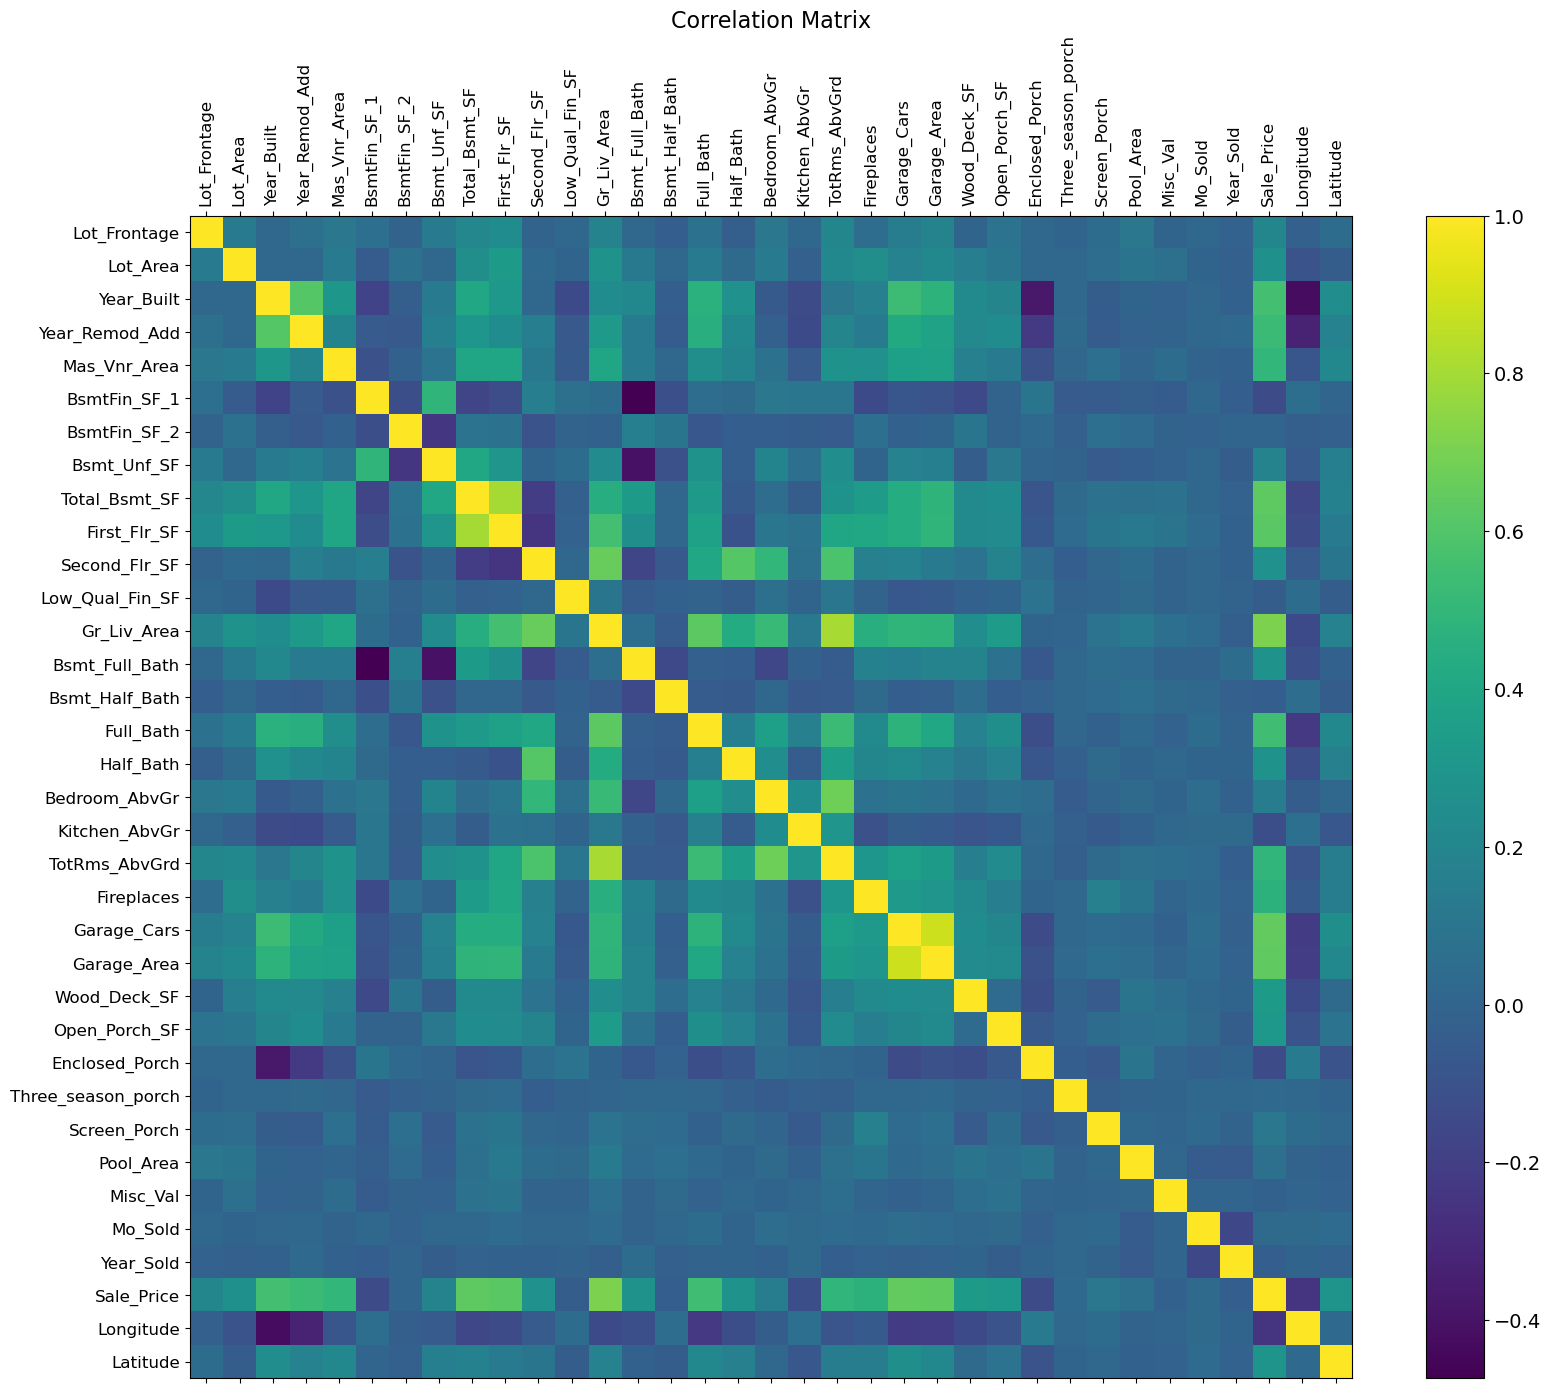

In [3]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [4]:
# We chose to drop the following columns, due to no correlation to the target variable

df = df.drop(columns=['MS_SubClass', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Lot_Config',
       'Land_Slope', 'Condition_1', 'Condition_2',
       'House_Style', 'Overall_Qual', 'Year_Built', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 
       'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual', 
       'Functional', 'Fireplace_Qu', 'Year_Sold', 'Pool_Area',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars',
       'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_QC', 'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold', 'Sale_Type', 'Longitude',
       'Latitude'])

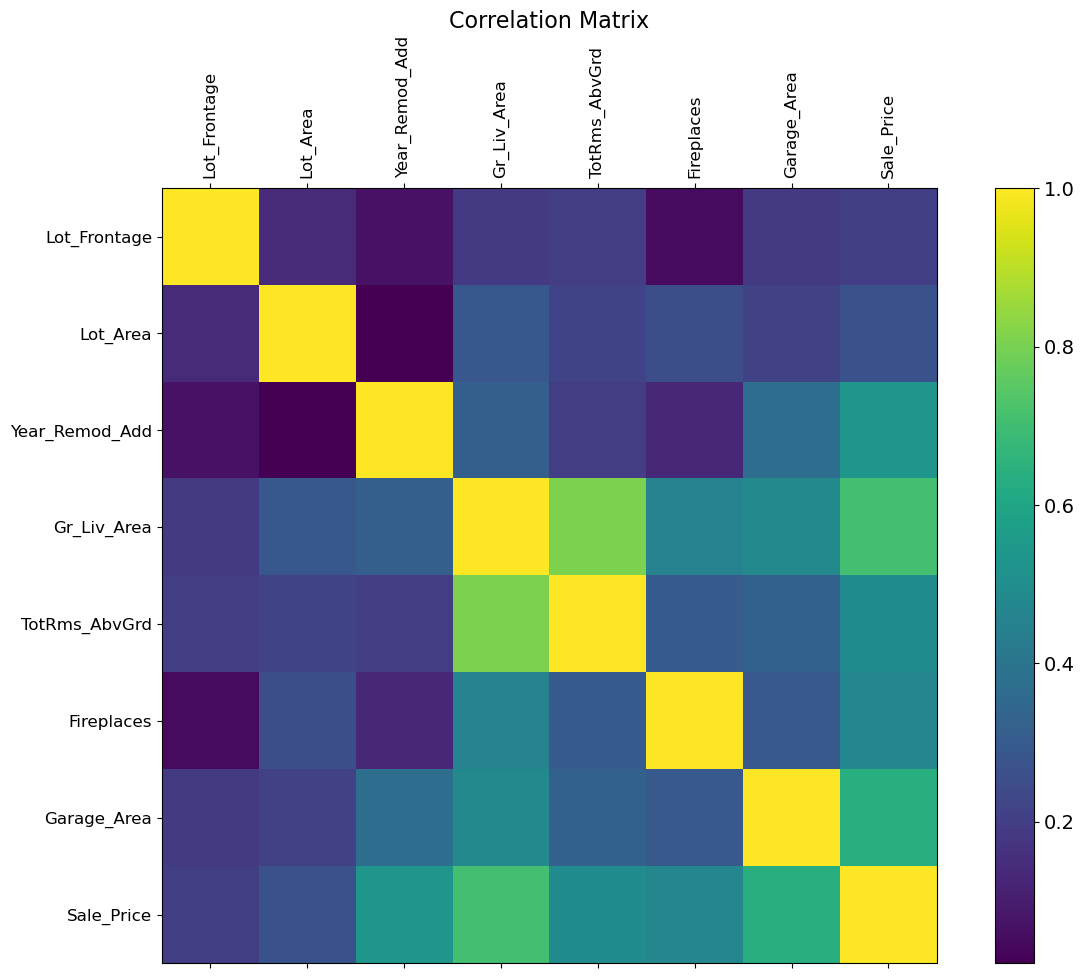

In [5]:
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [6]:
# Read the data
# Split at 2000
x_train = df[:2001].copy() # Train
y_train = x_train['Sale_Price']
x_train = x_train.drop(columns=['Sale_Price'])

x_test = df[2001:].copy() # Test
y_test = x_test['Sale_Price']
x_test = x_test.drop(columns=['Sale_Price'])

In [7]:
# Get names form numerical and categorial coloumns

categorical_cols = [col for col in x_train.columns if x_train[col].dtype == 'object']
numerical_cols = [col for col in x_train.columns if (x_train[col].dtype == 'int64' or x_train[col].dtype == 'float64')]

## DecisionTreeRegressor

---

In [9]:
from sklearn.tree import DecisionTreeRegressor


numerical_transformer = SimpleImputer()
categorical_transformer = Pipeline(steps=
                                   [('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=
                                 [('num', numerical_transformer, numerical_cols), 
                                  ('cat', categorical_transformer, categorical_cols)])

model = DecisionTreeRegressor()

pipeline = Pipeline(steps=
                   [('preprocess', preprocessor),
                   ('model', model)])

grid = GridSearchCV(pipeline,  
                    param_grid={'model__max_depth': [2, 5, 10],
                                'model__splitter' : ["best", "random"]
                               },
                    cv = 10,

                    scoring = 'r2'
                    )

grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Lot_Frontage',
                                                                          'Lot_Area',
                                                                          'Year_Remod_Add',
                                                                          'Gr_Liv_Area',
                                                                          'TotRms_AbvGrd',
                                                                          'Fireplaces',
                                                                          'Garage_Area']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MS_Zoning',
                                                                          'Utilities',
                                                                          'Neighborhood',
                                                                          'Bldg_Type',
                                                                          'Overall_Cond',
                                                                          'Heating_QC',
                                                                          'Central_Air',
                                                                          'Sale_Condition'])])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [2, 5, 10],
                         'model__splitter': ['best', 'random']},
             scoring='r2')

In [10]:
print(f"Best model parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best model parameters: {'model__max_depth': 10, 'model__splitter': 'random'}
Best score: 0.5341200622587765


In [11]:
y_pred = grid.predict(x_test)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MAE: 28139.18109674706
MSE: 1826493786.571236
R2: 0.6920235125432044


In [13]:
pd.DataFrame({'Id': x_test.index, 'Pred_Sale_Price': np.round(y_pred),'Sale_Price':y_test})

,Id,Pred_Sale_Price,Sale_Price
2001,2001,240000.0,159500
2002,2002,102600.0,87000
2003,2003,110167.0,104500
2004,2004,161950.0,110000
2005,2005,140843.0,136500
...,...,...,...
2925,2925,146278.0,142500
2926,2926,134587.0,131000
2927,2927,137061.0,132000
2928,2928,167724.0,170000


## GradientBoostingRegressor

---

In [14]:

from sklearn.ensemble import GradientBoostingRegressor


numerical_transformer = SimpleImputer()
categorical_transformer = Pipeline(steps=
                                   [('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=
                                 [('num', numerical_transformer, numerical_cols), 
                                  ('cat', categorical_transformer, categorical_cols)])

model = GradientBoostingRegressor()

pipeline = Pipeline(steps=
                   [('preprocess', preprocessor),
                   ('model', model)])

grid = GridSearchCV(pipeline,  
                    param_grid={'model__n_estimators': [2000, 3500],
                                'model__learning_rate' : [1e-2, 1e-3, 1e-4],
                                'model__loss': ['squared_error', 'absolute_error']
                               },
                    cv = 10,

                    scoring = 'r2'
                    )

grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Lot_Frontage',
                                                                          'Lot_Area',
                                                                          'Year_Remod_Add',
                                                                          'Gr_Liv_Area',
                                                                          'TotRms_AbvGrd',
                                                                          'Fireplaces',
                                                                          'Garage_Area']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MS_Zoning',
                                                                          'Utilities',
                                                                          'Neighborhood',
                                                                          'Bldg_Type',
                                                                          'Overall_Cond',
                                                                          'Heating_QC',
                                                                          'Central_Air',
                                                                          'Sale_Condition'])])),
                                       ('model', GradientBoostingRegressor())]),
             param_grid={'model__learning_rate': [0.01, 0.001, 0.0001],
                         'model__loss': ['squared_error', 'absolute_error'],
                         'model__n_estimators': [2000, 3500]},
             scoring='r2')

In [15]:
print(f"Best model parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Best model parameters: {'model__learning_rate': 0.01, 'model__loss': 'absolute_error', 'model__n_estimators': 2000}
Best score: 0.7666036765378015


In [16]:
y_pred = grid.predict(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MAE: 20507.86362409406
MSE: 1001641162.7907555
R2: 0.8311070482273408


In [18]:
pd.DataFrame({'Id': x_test.index, 'Pred_Sale_Price': np.round(y_pred),'Sale_Price':y_test})

,Id,Pred_Sale_Price,Sale_Price
2001,2001,238774.0,159500
2002,2002,112050.0,87000
2003,2003,112794.0,104500
2004,2004,137839.0,110000
2005,2005,121513.0,136500
...,...,...,...
2925,2925,138782.0,142500
2926,2926,135241.0,131000
2927,2927,126941.0,132000
2928,2928,157293.0,170000


## XGBRegressor

---

In [19]:
from xgboost import XGBRegressor

numerical_transformer = SimpleImputer()
categorical_transformer = Pipeline(steps=
                                   [('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=
                                 [('num', numerical_transformer, numerical_cols), 
                                  ('cat', categorical_transformer, categorical_cols)])

model = XGBRegressor(random_state=0)

pipeline = Pipeline(steps=
                   [('preprocess', preprocessor),
                   ('model', model)])

grid = GridSearchCV(pipeline,  
                    param_grid={'model__n_estimators': [2000, 3000],
                                'model__learning_rate' : [1e-2, 1e-3, 1e-4],
                                'model__max_depth':[2,5,10]                          
                               },
                    cv = 10,
                    scoring = 'r2'
                    )

grid.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
print(f"Best model parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

In [ ]:
pd.DataFrame({'Id': x_test.index, 'Pred_Sale_Price': np.round(y_pred),'Sale_Price':y_test})